In [1]:
import pandas as pd
from pathlib import Path

DATA = Path("../data")
OUT  = Path("../outputs")
OUT.mkdir(exist_ok=True)


In [2]:
items         = pd.read_csv(DATA/"items.csv")
promotions    = pd.read_csv(DATA/"Promotion.csv")
sales         = pd.read_csv(DATA/"Sales.csv")
supermarkets  = pd.read_csv(DATA/"Supermarkets.csv")

len(items), len(promotions), len(sales), len(supermarkets)


(927, 351372, 1048575, 387)

In [4]:
for name, df in {
    "items": items, 
    "promotions": promotions,
    "sales": sales, 
    "supermarkets": supermarkets
}.items():
    print(f"\n== {name.upper()} ==")
    display(df.head(3))
    display(df.info())
    
    # Try numeric describe if numeric cols exist, else fallback to all
    try:
        desc = df.describe()
    except TypeError:
        # Fallback for older pandas (no numeric_only param)
        desc = df.select_dtypes(include="number").describe()
    display(desc)



== ITEMS ==


,code,descrption,type,brand,size
0,3000005040,AUNT JEM ORIGINAL PANCAKE MIX,Type 1,Aunt Jemima,2 LB
1,3000005070,A/JEM COMPLETE PANCAKE MI,Type 1,Aunt Jemima,32 OZ
2,3000005300,AJ BUTTERMILK PANCAKE MIX,Type 1,Aunt Jemima,32 OZ


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 927 entries, 0 to 926
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   code        927 non-null    int64 
 1   descrption  927 non-null    object
 2   type        927 non-null    object
 3   brand       927 non-null    object
 4   size        927 non-null    object
dtypes: int64(1), object(4)
memory usage: 36.3+ KB


None

,code
count,9.270000e+02
mean,5.534602e+09
std,2.754209e+09
min,1.111124e+08
25%,3.340061e+09
50%,5.100005e+09
75%,7.520001e+09
max,9.999986e+09



== PROMOTIONS ==


,code,supermarkets,week,feature,display,province
0,2700042240,285,91,Not on Feature,Mid-Aisle End Cap,2
1,2700042292,285,92,Interior Page Feature,Not on Display,2
2,2700042274,285,92,Interior Page Feature,Not on Display,2


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 351372 entries, 0 to 351371
Data columns (total 6 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   code          351372 non-null  int64 
 1   supermarkets  351372 non-null  int64 
 2   week          351372 non-null  int64 
 3   feature       351372 non-null  object
 4   display       351372 non-null  object
 5   province      351372 non-null  int64 
dtypes: int64(4), object(2)
memory usage: 16.1+ MB


None

,code,supermarkets,week,province
count,3.513720e+05,351372.000000,351372.000000,351372.000000
mean,6.107931e+09,191.897815,69.844330,1.410332
std,2.881551e+09,111.168403,17.507184,0.491895
min,6.010113e+08,1.000000,43.000000,1.000000
25%,3.620000e+09,94.000000,55.000000,1.000000
50%,5.100001e+09,191.000000,68.000000,1.000000
75%,9.999968e+09,287.000000,85.000000,2.000000
max,9.999986e+09,387.000000,104.000000,2.000000



== SALES ==


,code,amount,units,time,province,week,customerId,supermarket,basket,day,voucher
0,7680850106,0.80,1,1100,2,1,125434,244,1,1,0
1,3620000470,3.59,1,1100,2,1,125434,244,1,1,0
2,1800028064,2.25,1,1137,2,1,108320,244,2,1,0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 11 columns):
 #   Column       Non-Null Count    Dtype  
---  ------       --------------    -----  
 0   code         1048575 non-null  int64  
 1   amount       1048575 non-null  float64
 2   units        1048575 non-null  int64  
 3   time         1048575 non-null  int64  
 4   province     1048575 non-null  int64  
 5   week         1048575 non-null  int64  
 6   customerId   1048575 non-null  int64  
 7   supermarket  1048575 non-null  int64  
 8   basket       1048575 non-null  int64  
 9   day          1048575 non-null  int64  
 10  voucher      1048575 non-null  int64  
dtypes: float64(1), int64(10)
memory usage: 88.0 MB


None

,code,amount,units,time,province,week,customerId,supermarket,basket,day,voucher
count,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06
mean,6.067646e+09,1.780470e+00,1.188219e+00,1.543165e+03,1.441374e+00,1.347071e+01,2.003481e+05,1.980431e+02,3.333491e+05,9.119343e+01,2.356245e-02
std,3.154184e+09,5.966503e+00,5.466197e-01,3.833751e+02,4.965514e-01,8.549682e+00,1.247446e+05,1.122828e+02,1.917741e+05,5.983773e+01,1.516815e-01
min,1.111124e+08,-8.280000e+00,1.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00
25%,3.620000e+09,9.900000e-01,1.000000e+00,1.259000e+03,1.000000e+00,6.000000e+00,9.211700e+04,1.010000e+02,1.681505e+05,3.900000e+01,0.000000e+00
50%,5.100003e+09,1.500000e+00,1.000000e+00,1.601000e+03,1.000000e+00,1.200000e+01,1.905030e+05,2.000000e+02,3.318470e+05,8.300000e+01,0.000000e+00
75%,9.999982e+09,2.190000e+00,1.000000e+00,1.824000e+03,2.000000e+00,2.300000e+01,3.039840e+05,2.950000e+02,5.000225e+05,1.570000e+02,0.000000e+00
max,9.999986e+09,5.900000e+03,1.000000e+02,2.359000e+03,2.000000e+00,2.800000e+01,5.100270e+05,3.850000e+02,6.654500e+05,1.950000e+02,1.000000e+00



== SUPERMARKETS ==


,supermarket_No,postal-code
0,199,30319
1,200,30134
2,201,30066


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 387 entries, 0 to 386
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   supermarket_No  387 non-null    int64
 1   postal-code     387 non-null    int64
dtypes: int64(2)
memory usage: 6.2 KB


None

,supermarket_No,postal-code
count,387.000000,387.000000
mean,194.000000,35450.255814
std,111.861522,6677.325786
min,1.000000,29063.000000
25%,97.500000,30142.000000
50%,194.000000,31545.000000
75%,290.500000,40086.500000
max,387.000000,62966.000000


In [5]:
import pandas as pd

# 1) Find a time-like column in sales
time_col = next((
    c for c in sales.columns
    if "time" in c.lower() or "date" in c.lower()
), None)
print("Time-like column:", time_col)

s = sales[time_col]

# 2) Parse robustly (handles epoch in s/ms/us/ns or text dates)
if pd.api.types.is_numeric_dtype(s):
    candidates = {}
    for unit in ["s", "ms", "us", "ns"]:
        dt = pd.to_datetime(s, unit=unit, errors="coerce")
        span_days = (dt.max() - dt.min()).days if dt.notna().any() else -1
        yr_ok = dt.dropna().dt.year.between(2000, 2035).mean() if dt.notna().any() else 0
        candidates[unit] = (span_days, yr_ok, dt)
    # choose unit with valid years, then largest span
    best_unit = max(candidates, key=lambda u: (candidates[u][1], candidates[u][0]))
    dt = candidates[best_unit][2]
    print("Detected epoch unit:", best_unit)
else:
    dt = pd.to_datetime(s, errors="coerce")

sales["transaction_time"] = dt

# 3) Quick coverage checks
print("min:", sales["transaction_time"].min())
print("max:", sales["transaction_time"].max())
print("months:", sales["transaction_time"].dt.to_period("M").nunique())
print("weeks:", sales["transaction_time"].dt.strftime("%G-%V").nunique())


Time-like column: time
Detected epoch unit: s
min: 1970-01-01 00:00:00
max: 1970-01-01 00:39:19
months: 1
weeks: 1


In [6]:
# Force parse as milliseconds
sales["transaction_time"] = pd.to_datetime(sales["time"], unit="ms", errors="coerce")

print("min:", sales["transaction_time"].min())
print("max:", sales["transaction_time"].max())
print("months:", sales["transaction_time"].dt.to_period("M").nunique())
print("weeks:", sales["transaction_time"].dt.strftime("%G-%V").nunique())


min: 1970-01-01 00:00:00
max: 1970-01-01 00:00:02.359000
months: 1
weeks: 1


In [7]:
import pandas as pd

# convert numeric like 0..2359 to zero-padded strings, then parse as HHMM
t = (sales["time"]
     .astype("Int64")           # handle NaNs too
     .astype(str)
     .str.zfill(4))

sales["time_of_day"] = pd.to_datetime(t, format="%H%M", errors="coerce").dt.time

print("Parsed % time non-null:",
      sales["time_of_day"].notna().mean())
sales[["time","time_of_day"]].head(10)


Parsed % time non-null: 1.0


,time,time_of_day
0,1100,11:00:00
1,1100,11:00:00
2,1137,11:37:00
3,1148,11:48:00
4,1323,13:23:00
5,1323,13:23:00
6,1415,14:15:00
7,1415,14:15:00
8,1513,15:13:00
9,1523,15:23:00


In [9]:
import re

def clean_cols(df):
    df = df.copy()
    df.columns = (
        df.columns
          .str.strip()
          .str.replace(r"\s+", "_", regex=True)
          .str.replace(r"[^\w]", "_", regex=True)
          .str.lower()
    )
    return df

items        = clean_cols(items)
promotions   = clean_cols(promotions)
sales        = clean_cols(sales)
supermarkets = clean_cols(supermarkets)

print("SALES columns:", list(sales.columns))
print("ITEMS columns:", list(items.columns))
print("PROMOTIONS columns:", list(promotions.columns))
print("SUPERMARKETS columns:", list(supermarkets.columns))


SALES columns: ['code', 'amount', 'units', 'time', 'province', 'week', 'customerid', 'supermarket', 'basket', 'day', 'voucher', 'transaction_time', 'time_of_day']
ITEMS columns: ['code', 'descrption', 'type', 'brand', 'size']
PROMOTIONS columns: ['code', 'supermarkets', 'week', 'feature', 'display', 'province']
SUPERMARKETS columns: ['supermarket_no', 'postal_code']


In [10]:
# Parse 'day' column (calendar date)
sales["date"] = pd.to_datetime(sales["day"], errors="coerce")

# Combine with parsed time_of_day
sales["transaction_datetime"] = pd.to_datetime(
    sales["date"].astype(str) + " " + sales["time_of_day"].astype(str),
    errors="coerce"
)

print("min:", sales["transaction_datetime"].min())
print("max:", sales["transaction_datetime"].max())
print("months:", sales["transaction_datetime"].dt.to_period("M").nunique())
print("weeks:", sales["transaction_datetime"].dt.strftime("%G-%V").nunique())


C:\Users\sik2k\AppData\Local\Temp\ipykernel_944\1159289215.py:5: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  sales["transaction_datetime"] = pd.to_datetime(


min: 1970-01-01 00:00:00.000000001
max: 1970-01-01 23:59:00.000000194
months: 1
weeks: 1


In [11]:
import pandas as pd
import numpy as np

# 1) Normalize week and day
wk = pd.to_numeric(sales["week"], errors="coerce").astype("Int64")

# day can be 1..7 or names like Mon/Tue
if sales["day"].dtype == object:
    day_map = {"mon":1,"tue":2,"wed":3,"thu":4,"fri":5,"sat":6,"sun":7}
    dy = (sales["day"].astype(str).str.strip().str[:3].str.lower()
          .map(day_map)).astype("Int64")
else:
    dy = pd.to_numeric(sales["day"], errors="coerce").astype("Int64")

# Safety clamp: keep day within 1..7
dy = dy.where(dy.between(1,7))

# 2) Choose a base Monday (arbitrary but consistent). Jan 1, 2018 was a Monday.
BASE_MONDAY = pd.Timestamp("2018-01-01")  # adjust if you prefer another anchor

# 3) Compute transaction_date from week/day
sales["transaction_date"] = BASE_MONDAY + pd.to_timedelta((wk - 1) * 7 + (dy - 1), unit="D")

# 4) Combine with time_of_day to get full timestamp
sales["transaction_datetime"] = pd.to_datetime(
    sales["transaction_date"].astype(str) + " " + sales["time_of_day"].astype(str),
    errors="coerce"
)

print("weeks (unique):", wk.nunique(dropna=True))
print("days (unique):", dy.nunique(dropna=True))
print("min:", sales["transaction_datetime"].min())
print("max:", sales["transaction_datetime"].max())
print("approx months (by period):", sales["transaction_datetime"].dt.to_period("M").nunique())


weeks (unique): 25
days (unique): 7
min: 2018-01-01 00:00:00
max: 2018-01-07 23:59:00
approx months (by period): 1


In [12]:
print("week dtype:", sales["week"].dtype, "day dtype:", sales["day"].dtype)
print("week min/max:", pd.to_numeric(sales["week"], errors="coerce").min(), pd.to_numeric(sales["week"], errors="coerce").max())

print("\nTop 10 week values:")
print(pd.to_numeric(sales["week"], errors="coerce").value_counts().sort_index().head(10))

print("\nSample of (week, day):")
display(sales[["week","day"]].head(12))


week dtype: int64 day dtype: int64
week min/max: 1 28

Top 10 week values:
week
1     43148
2     42443
3     54344
4     53512
5     43824
6     47036
7     49608
8     47702
9     27909
10    21164
Name: count, dtype: int64

Sample of (week, day):


,week,day
0,1,1
1,1,1
2,1,1
3,1,1
4,1,1
5,1,1
6,1,1
7,1,1
8,1,1
9,1,1


In [13]:
import numpy as np
import pandas as pd

# numeric week
wk = pd.to_numeric(sales["week"], errors="coerce").astype("float")
# day-of-week: numbers 1..7 or names
if sales["day"].dtype == object:
    day_map = {"mon":1,"tue":2,"wed":3,"thu":4,"fri":5,"sat":6,"sun":7}
    dy = (sales["day"].astype(str).str.strip().str[:3].str.lower().map(day_map)).astype("float")
else:
    dy = pd.to_numeric(sales["day"], errors="coerce").astype("float")

# keep valid rows only
mask = wk.notna() & dy.notna() & (dy.between(1,7))
wk_i = wk[mask].to_numpy(dtype=np.int64)
dy_i = dy[mask].to_numpy(dtype=np.int64)

BASE_MONDAY = pd.Timestamp("2018-01-01")  # arbitrary anchor Monday

offset_days = (wk_i - 1) * 7 + (dy_i - 1)
tx_date = BASE_MONDAY + pd.to_timedelta(offset_days, unit="D")

# write back (others become NaT)
sales["transaction_date"] = pd.NaT
sales.loc[mask, "transaction_date"] = tx_date

# combine with time_of_day
sales["transaction_datetime"] = pd.to_datetime(
    sales["transaction_date"].astype(str) + " " + sales["time_of_day"].astype(str),
    errors="coerce"
)

print("weeks (unique):", pd.unique(wk_i).size)
print("days (unique):", pd.unique(dy_i).size)
print("min:", sales["transaction_datetime"].min())
print("max:", sales["transaction_datetime"].max())
print("approx months:", sales["transaction_datetime"].dt.to_period("M").nunique())


weeks (unique): 1
days (unique): 7
min: 2018-01-01 00:00:00
max: 2018-01-07 23:59:00
approx months: 1


In [14]:
import pandas as pd

BASE_MONDAY = pd.Timestamp("2018-01-01")  # anchor Monday

# Vectorized offsets: weeks + days
w_off = pd.to_timedelta(sales["week"] - 1, unit="W")
d_off = pd.to_timedelta(sales["day"]  - 1, unit="D")

sales["transaction_date"] = BASE_MONDAY + w_off + d_off

# Combine with time_of_day
sales["transaction_datetime"] = pd.to_datetime(
    sales["transaction_date"].astype(str) + " " + sales["time_of_day"].astype(str),
    errors="coerce"
)

print("min:", sales["transaction_datetime"].min())
print("max:", sales["transaction_datetime"].max())
print("months:", sales["transaction_datetime"].dt.to_period("M").nunique())
print("weeks:", sales["transaction_datetime"].dt.strftime("%G-%V").nunique())


min: 2018-01-01 00:00:00
max: 2019-01-19 05:29:00
months: 12
weeks: 25


In [15]:
import pandas as pd

# 7.1 — normalize column names for joining
items = items.rename(columns={"descrption":"description"})  # fix typo
promotions = promotions.rename(columns={"supermarkets":"supermarket"})
supermarkets = supermarkets.rename(columns={"supermarket_no":"supermarket"})

# 7.2 — ensure key dtypes match (strings are safest here)
for df, cols in [
    (sales, ["code","supermarket","week","province"]),
    (items, ["code"]),
    (promotions, ["code","supermarket","week","province"]),
    (supermarkets, ["supermarket"]),
]:
    for c in cols:
        if c in df.columns:
            df[c] = df[c].astype(str).str.strip()

# 7.3 — choose the essential sales columns to carry forward
sales_core_cols = [
    "code","supermarket","week","province","amount","units",
    "voucher","customerid","basket","transaction_datetime"
]
sales_core = sales[sales_core_cols].copy()

# 7.4 — merge (LEFT joins to keep all sales)
df = (sales_core
      .merge(items,        on="code",       how="left", suffixes=("", "_item"))
      .merge(supermarkets, on="supermarket",how="left", suffixes=("", "_store"))
      .merge(promotions,   on=["code","supermarket","week","province"], how="left", suffixes=("", "_promo"))
)

print("Joined shape:", df.shape)

# 7.5 — quick match diagnostics
def match_rate(left, right, on):
    keys = on if isinstance(on, list) else [on]
    left_key = left[keys].astype(str).agg("|".join, axis=1)
    right_key = right[keys].astype(str).agg("|".join, axis=1)
    rate = left_key.isin(set(right_key)).mean()
    return round(float(rate), 3)

print("Match sales→items by code:",        match_rate(sales_core, items,        "code"))
print("Match sales→stores by supermarket:", match_rate(sales_core, supermarkets, "supermarket"))
print("Match sales→promo (code,supermarket,week,province):",
      match_rate(sales_core, promotions, ["code","supermarket","week","province"]))

# 7.6 — basic null scan on key lookups
null_report = {
    "missing_item": df["description"].isna().mean(),
    "missing_store": df["postal_code"].isna().mean(),
    "missing_promo": df["feature"].isna().mean() if "feature" in df.columns else 1.0,
}
print("Null match rates:", {k: round(v,3) for k,v in null_report.items()})

# 7.7 — keep a tidy subset for modeling later
keep_cols = [
    # identifiers
    "code","description","type","brand","size",
    "supermarket","postal_code","province","week","voucher","customerid","basket",
    # targets/features
    "amount","units","feature","display",
    # time
    "transaction_datetime",
]
keep_cols = [c for c in keep_cols if c in df.columns]
model_df = df[keep_cols].copy()

print("model_df shape:", model_df.shape)
model_df.head(3)


Joined shape: (1048575, 17)
Match sales→items by code: 1.0
Match sales→stores by supermarket: 1.0
Match sales→promo (code,supermarket,week,province): 0.0
Null match rates: {'missing_item': np.float64(0.0), 'missing_store': np.float64(0.0), 'missing_promo': np.float64(1.0)}
model_df shape: (1048575, 17)


,code,description,type,brand,size,supermarket,postal_code,province,week,voucher,customerid,basket,amount,units,feature,display,transaction_datetime
0,7680850106,BARILLA ANGEL HAIR,Type 2,Barilla,16 OZ,244,40222,2,1,0,125434,1,0.80,1,NaN,NaN,2018-01-01 11:00:00
1,3620000470,BERTOLLI TOM&BASIL SAUCE,Type 3,Bertolli,24 OZ,244,40222,2,1,0,125434,1,3.59,1,NaN,NaN,2018-01-01 11:00:00
2,1800028064,H J PANCK BTRMLK COMP MIX,Type 1,Hungry Jack,,244,40222,2,1,0,108320,2,2.25,1,NaN,NaN,2018-01-01 11:37:00


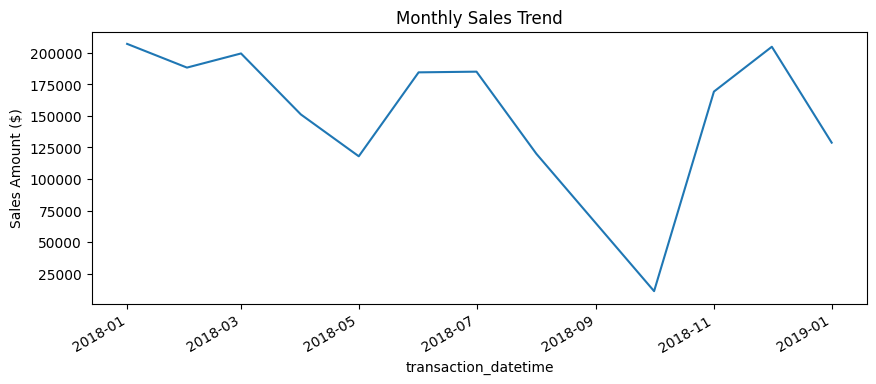

Top 10 Items by Sales Amount:
description
PRIVATE LABEL SPAGHETTI REGULAR       40596.05
PRIVATE LABEL THIN SPAGHETTI          33904.94
RAGU TRADITIONAL PLAIN                32273.12
PRIVATE LABEL ELBOW MACARONI          24043.78
PREGO REG SPAGHETTI SAUCE             22328.59
AUNT JEMIMA ORIGINL SYRUP             21914.70
PRIVATE LABEL SYRUP PLASTIC BOTTLE    19147.02
RAGU OWS SPAG SAUCE MEAT              18700.43
PREGO MUSHROOM SPAG SAUCE             16815.44
PREGO SPAG SAUCE PLAIN                16655.88
Name: amount, dtype: float64


In [16]:
import matplotlib.pyplot as plt

# Monthly sales trend
monthly = (model_df
           .groupby(model_df["transaction_datetime"].dt.to_period("M"))["amount"]
           .sum()
           .to_timestamp())

monthly.plot(figsize=(10,4), title="Monthly Sales Trend")
plt.ylabel("Sales Amount ($)")
plt.show()

# Top 10 items by sales amount
top_items = (model_df
             .groupby("description")["amount"]
             .sum()
             .sort_values(ascending=False)
             .head(10))

print("Top 10 Items by Sales Amount:")
print(top_items)


In [17]:
from sklearn.model_selection import train_test_split

# Select features (X) and target (y)
feature_cols = ["type", "brand", "size", "province", "week"]
X = model_df[feature_cols].copy()
y = model_df["amount"]

# One-hot encode categorical features
X = pd.get_dummies(X, drop_first=True)

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print("Train shape:", X_train.shape, "Test shape:", X_test.shape)


Train shape: (838860, 266) Test shape: (209715, 266)


In [19]:
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Fit baseline
lr = LinearRegression()
lr.fit(X_train, y_train)

# Predict
y_pred = lr.predict(X_test)

# Naive benchmark: always predict the training mean
naive_pred = np.full(shape=len(y_test), fill_value=y_train.mean(), dtype=float)

def rmse(y_true, y_hat):
    return np.sqrt(mean_squared_error(y_true, y_hat))

def report(name, y_true, y_hat):
    mae  = mean_absolute_error(y_true, y_hat)
    r2   = r2_score(y_true, y_hat)
    print(f"{name:>10} | MAE: {mae:,.2f} | RMSE: {rmse(y_true, y_hat):,.2f} | R²: {r2: .3f}")

report("Naive",  y_test, naive_pred)
report("Linear", y_test, y_pred)


     Naive | MAE: 0.83 | RMSE: 13.16 | R²: -0.000
    Linear | MAE: 0.50 | RMSE: 13.14 | R²:  0.003


In [20]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np
import pandas as pd

# 11.1 calendar features from transaction_datetime
tmp = model_df.copy()
tmp["month"] = tmp["transaction_datetime"].dt.month
tmp["dow"]   = tmp["transaction_datetime"].dt.dayofweek  # 0=Mon
tmp["hour"]  = tmp["transaction_datetime"].dt.hour

# 11.2 select features + target
feature_cols = ["type","brand","size","province","week","month","dow","hour","voucher","basket"]
X = pd.get_dummies(tmp[feature_cols], drop_first=True)
y = tmp["amount"]

# 11.3 split, fit, evaluate
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)

def rmse(y_true, y_hat): 
    return np.sqrt(((y_true - y_hat)**2).mean())

print(f"Linear+Cal | MAE: {mean_absolute_error(y_test, y_pred):.2f} | RMSE: {rmse(y_test, y_pred):.2f} | R²: {r2_score(y_test, y_pred):.3f}")


Linear+Cal | MAE: 0.49 | RMSE: 13.14 | R²: 0.003


In [21]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Reuse same feature set from Cell 11
X = pd.get_dummies(tmp[feature_cols], drop_first=True)
y = tmp["amount"]

# Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Random Forest
rf = RandomForestRegressor(
    n_estimators=100,
    max_depth=12,
    n_jobs=-1,
    random_state=42
)
rf.fit(X_train, y_train)

# Predict
y_pred = rf.predict(X_test)

def rmse(y_true, y_hat):
    return np.sqrt(((y_true - y_hat)**2).mean())

print(f"RandomForest | MAE: {mean_absolute_error(y_test, y_pred):.2f} "
      f"| RMSE: {rmse(y_test, y_pred):.2f} "
      f"| R²: {r2_score(y_test, y_pred):.3f}")


RandomForest | MAE: 0.47 | RMSE: 13.14 | R²: 0.003
